<a href="https://colab.research.google.com/github/Pranav-sync/Pranav-sync/blob/main/YHills_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1
**Sales Prediction**
**Project Idea:** The bigMart sales dataset is a treasure trove of learning
opportunities. It consists of 2013 sales data for 1559 products across ten outlets
in different cities. Your goal in this ML project is to build a regression model that
can predict the sales of each of these 1559 products for the following year in
each of the 10 different BigMart outlets. The dataset also includes specific
attributes for each product and store, providing valuable insights into the factors
influencing sales. This project is a fantastic way to understand how machine
learning can help businesses like BigMart increase their sales.

In [ ]:
# import required details

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [ ]:
#Load the Dataset

df = pd.read_csv("Train.csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Fatching Categorical Data
cat_col=[col for col in df.columns if df[col].dtype=='O'] #-->Object-"o"
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
#getting all the categorical data
categorical=df[cat_col]
categorical.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
# Drop the Item_Identifier column from dataset
categorical.drop('Item_Identifier', axis=1, inplace=True)

# Drop the Outlet_Identifier column from dataset
categorical.drop('Outlet_Identifier', axis=1, inplace=True)

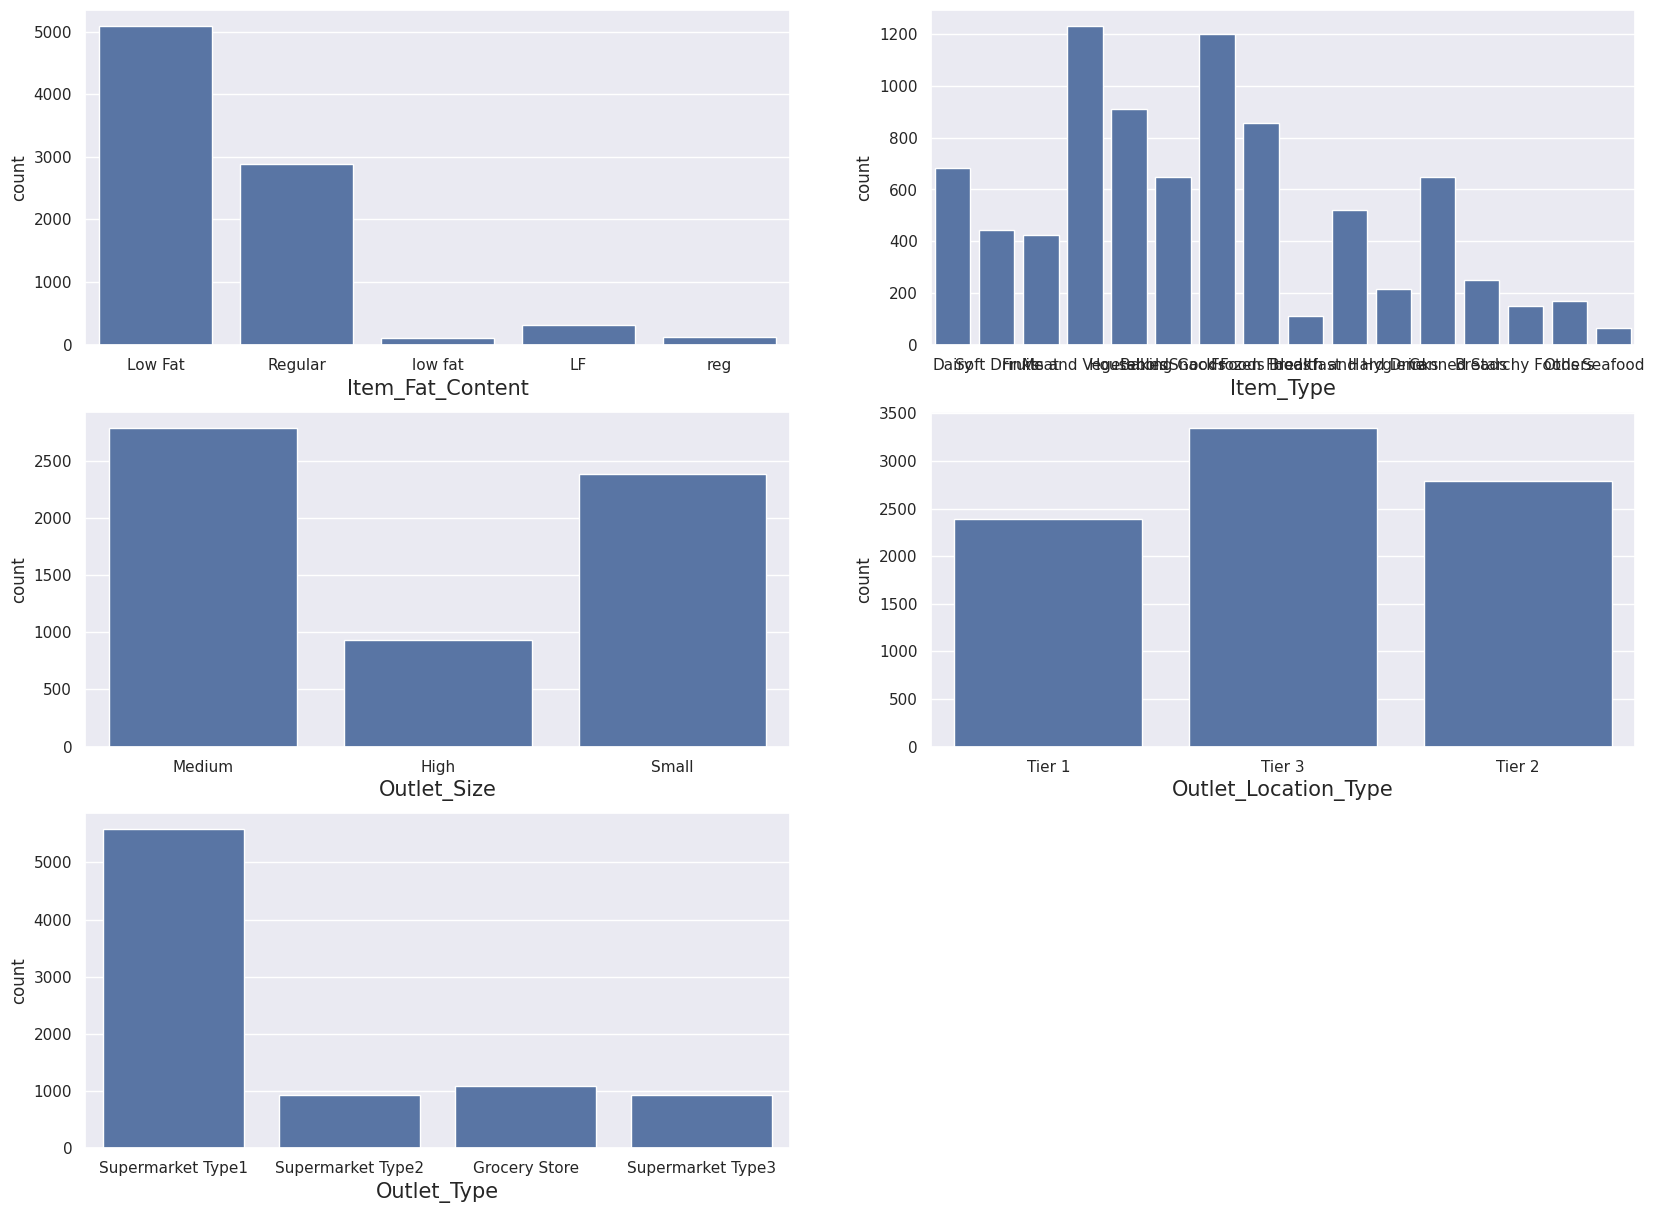

In [ ]:
plt.figure(figsize=(20,20))
plotnumber = 1

for column in categorical:
  if plotnumber <= 8:
    ax = plt.subplot(4,2,plotnumber)
    sns.countplot(x = categorical[column],data=categorical)
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

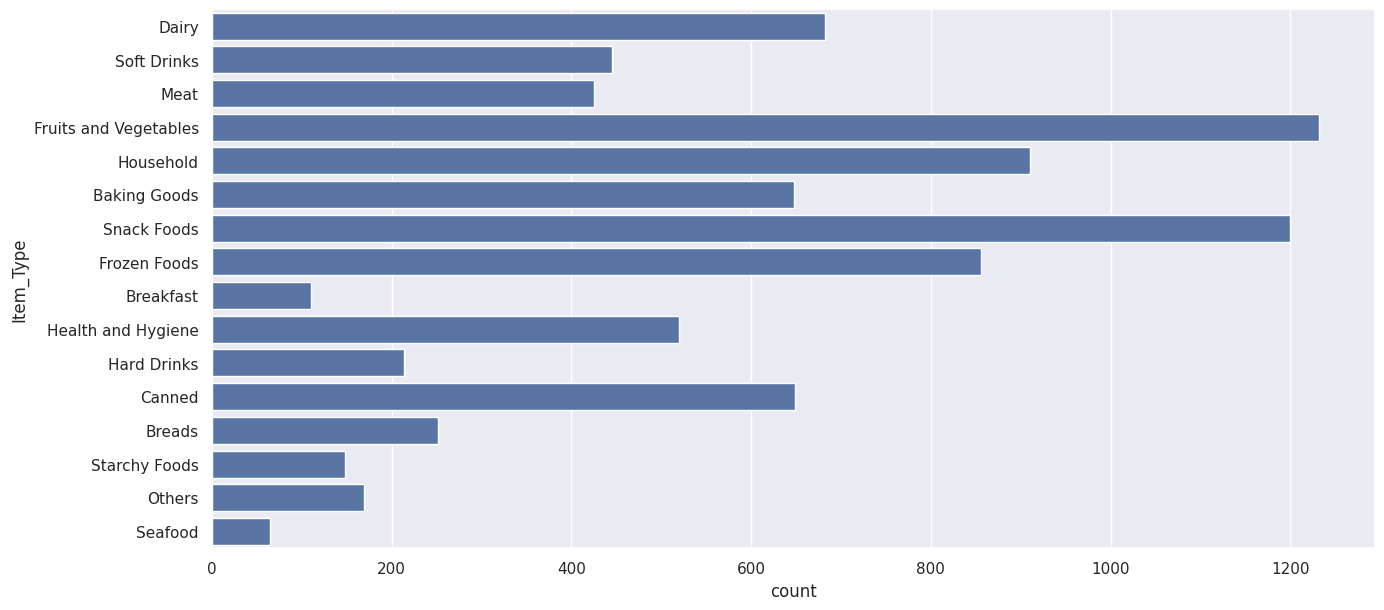

In [ ]:
# plotting the gender column in count plot
plt.figure(figsize = (15,7))
sns.countplot(y=categorical['Item_Type'])
plt.show()

In [ ]:
categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [ ]:
categorical.isnull().sum()

Item_Fat_Content           0
Item_Type                  0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
# impute missing value --> "Item_Type"
categorical["Outlet_Size"] = categorical["Outlet_Size"].fillna (categorical["Outlet_Size"].mode()[0])


# Now we dont have missing valies in categorical Data
categorical.isnull().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [ ]:
categorical.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
col =['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [ ]:
encoder = LabelEncoder()


def Label_Encoder(col):
  categorical[col] = encoder.fit_transform(categorical[col])


for i in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']:
  Label_Encoder(i)


categorical.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,1,0,1
1,2,14,1,2,2
2,1,10,1,0,1
3,2,6,1,2,0
4,1,9,0,2,1


In [ ]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [ ]:
df[Num_col].isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
Numerical = df[Num_col]
Numerical.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [ ]:
Numerical.shape

(8523, 5)

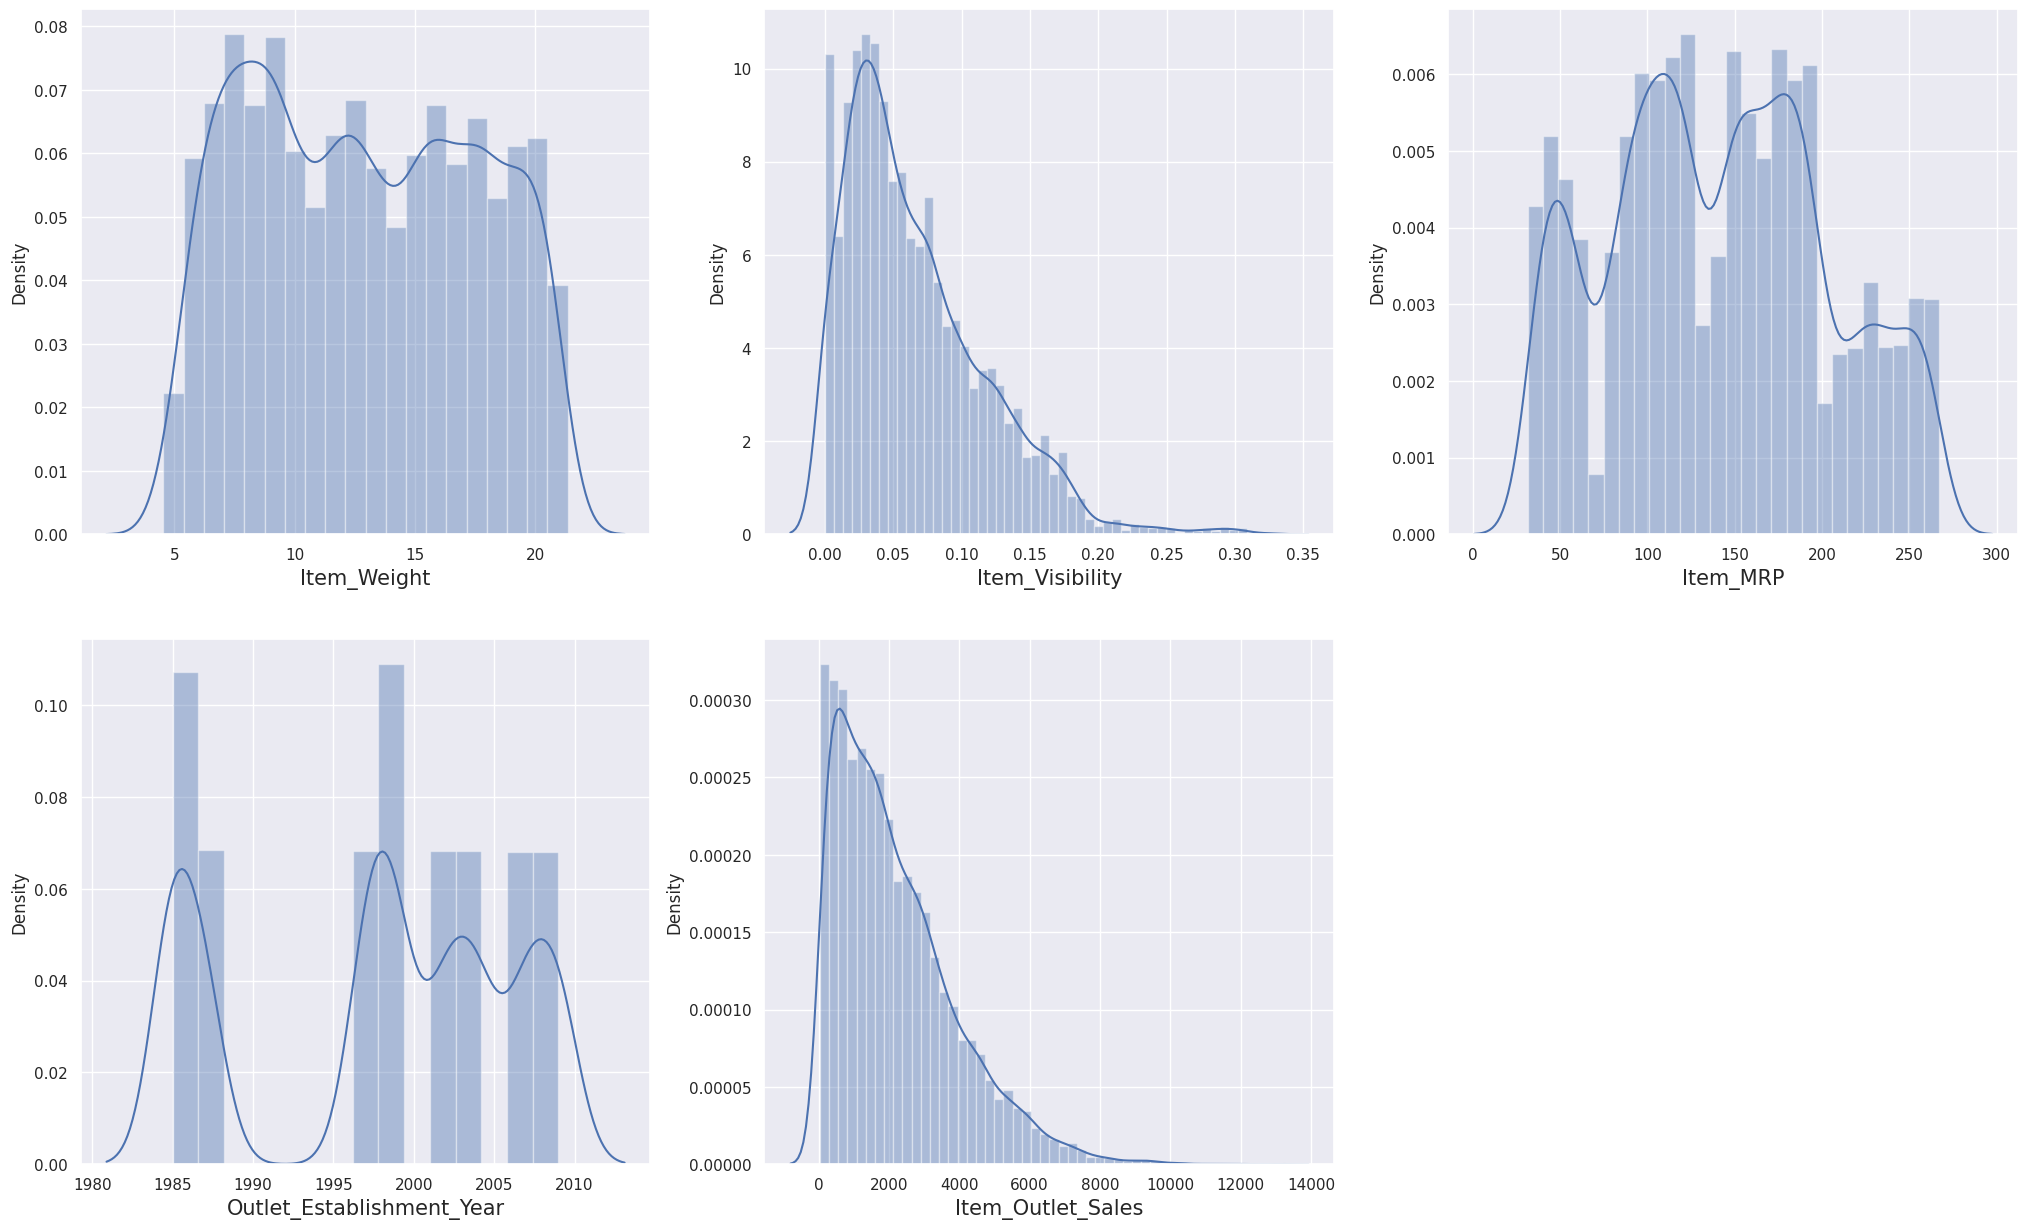

In [ ]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 7:
    ax = plt.subplot(2,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

In [ ]:
# Impute Missing using Mode method

Numerical["Item_Weight"] = Numerical["Item_Weight"].fillna(Numerical["Item_Weight"].mean())


#Now there is no missing value

Numerical.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

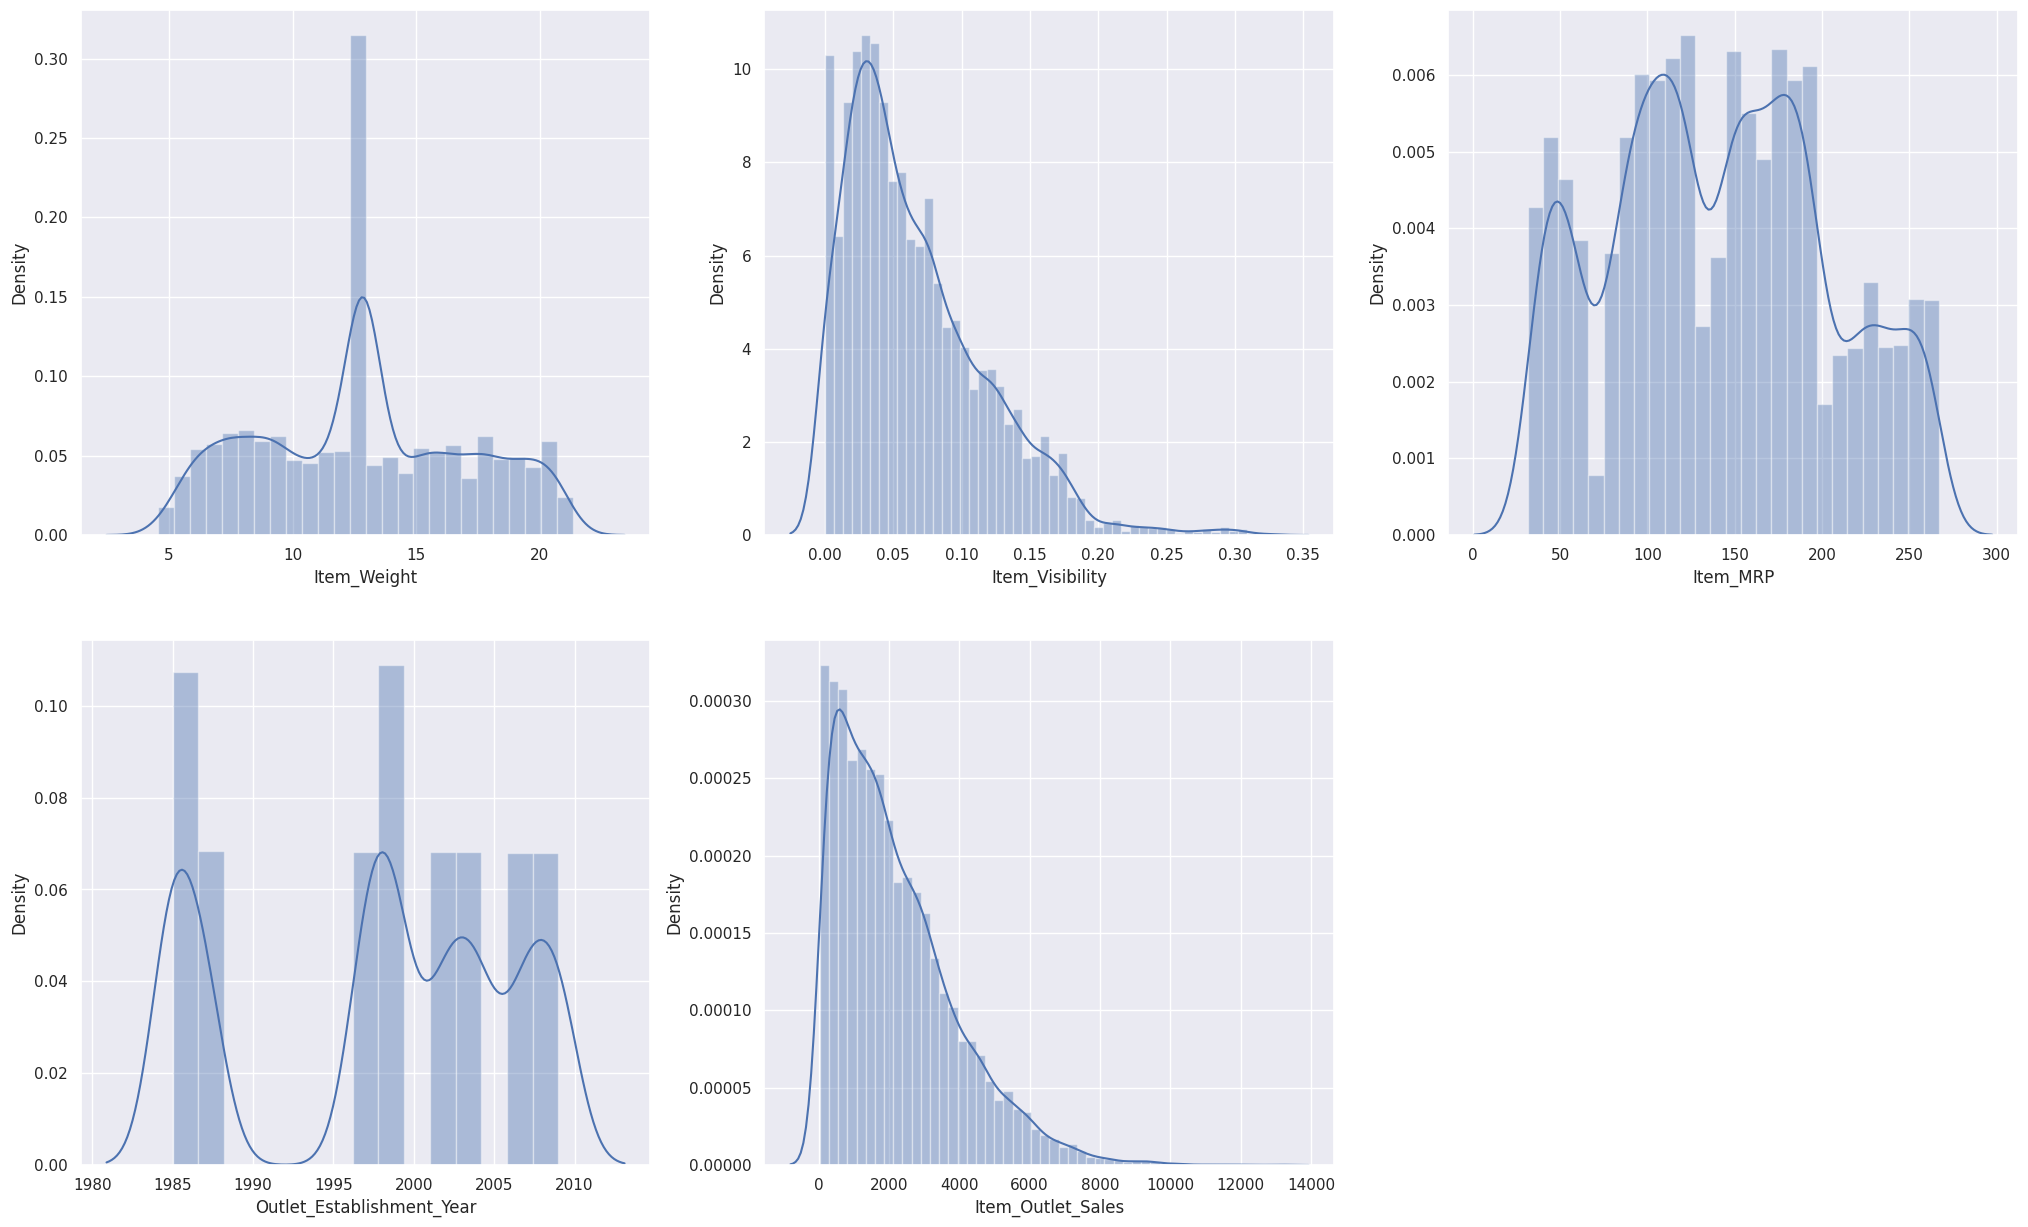

In [ ]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 6:
    ax = plt.subplot(2,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [ ]:
data = pd.concat([categorical,Numerical],axis=1)
data.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,1,4,1,0,1,9.30,0.016047,249.8092,1999,3735.1380
1,2,14,1,2,2,5.92,0.019278,48.2692,2009,443.4228
2,1,10,1,0,1,17.50,0.016760,141.6180,1999,2097.2700
3,2,6,1,2,0,19.20,0.000000,182.0950,1998,732.3800
4,1,9,0,2,1,8.93,0.000000,53.8614,1987,994.7052


In [ ]:
data.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: >

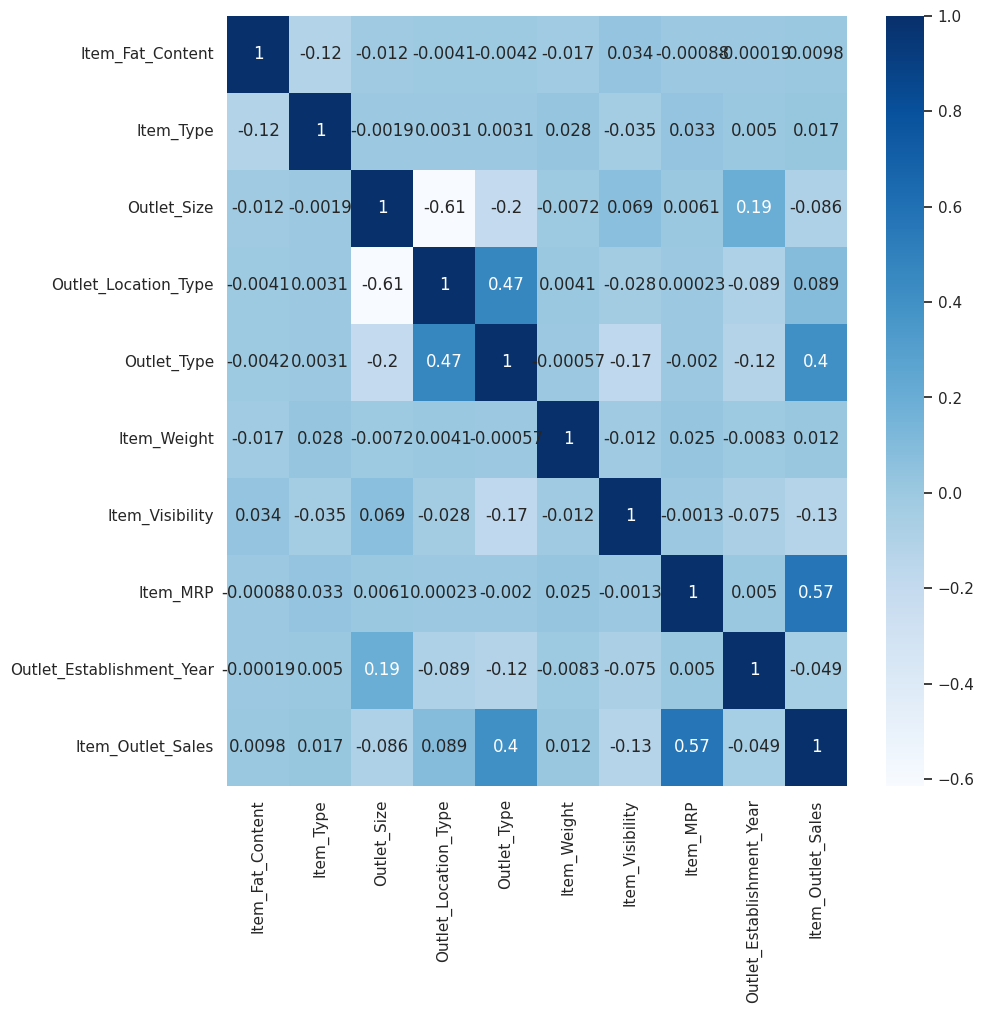

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='Blues',annot = True)

In [ ]:
X = data.drop(columns = ["Item_Outlet_Sales"],axis=1)
y = data["Item_Outlet_Sales"]

In [ ]:
X.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,1,4,1,0,1,9.30,0.016047,249.8092,1999
1,2,14,1,2,2,5.92,0.019278,48.2692,2009
2,1,10,1,0,1,17.50,0.016760,141.6180,1999
3,2,6,1,2,0,19.20,0.000000,182.0950,1998
4,1,9,0,2,1,8.93,0.000000,53.8614,1987


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X.shape

(8523, 9)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.57284357, -0.76647929, -0.28458121, ..., -0.97073217,
         1.74745381,  0.13954076],
       [ 0.97809218,  1.6089627 , -0.28458121, ..., -0.90811123,
        -1.48902325,  1.33410274],
       [-0.57284357,  0.6587859 , -0.28458121, ..., -0.95691733,
         0.01004021,  0.13954076],
       ...,
       [-0.57284357,  0.1836975 ,  1.38127431, ..., -0.59978449,
        -0.89720755,  0.73682175],
       [ 0.97809218,  1.3714185 , -0.28458121, ...,  1.53287976,
        -0.60797692,  1.33410274],
       [-0.57284357,  1.6089627 ,  1.38127431, ..., -0.41193591,
        -1.05226104, -0.09937163]])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [ ]:
vif

,VIF,Features
0,1.015290,Item_Fat_Content
1,1.016391,Item_Type
2,1.713702,Outlet_Size
3,2.043009,Outlet_Location_Type
4,1.373824,Outlet_Type
5,1.001814,Item_Weight
6,1.060192,Item_Visibility
7,1.001737,Item_MRP
8,1.069060,Outlet_Establishment_Year


In [ ]:
  # split the dataset into training and Testing data

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 10)

In [ ]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (6818, 9)
Shape of X Test:  (1705, 9)
Shape of y Train:  (6818,)
Shape of y Test:  (1705,)


In [ ]:
#from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

    sns.distplot(y_test-y_prediction)

Score : 0.5040213681091785
predictions are: 
 [4075.50383353 1587.8973914  2879.71148083 ...  954.40817735 2487.38930198
 3024.51530055]


r2 score: 0.522325175881748
MAE: 890.9193482066609
MSE: 1417935.58378453
RMSE: 1190.771003923311


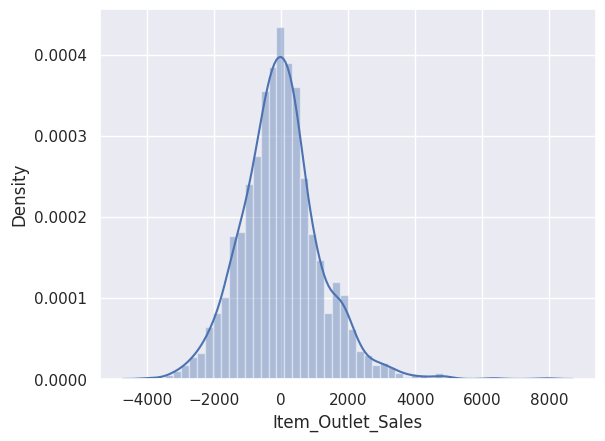

In [ ]:
# Linear Regression

predict(LinearRegression())

Score : 0.9371146763608031
predictions are: 
 [4351.841908 1909.987118 2029.950962 ...  974.890992 3381.951074
 2555.04079 ]


r2 score: 0.5690474777417871
MAE: 796.1786937184751
MSE: 1279244.551687617
RMSE: 1131.036936482455


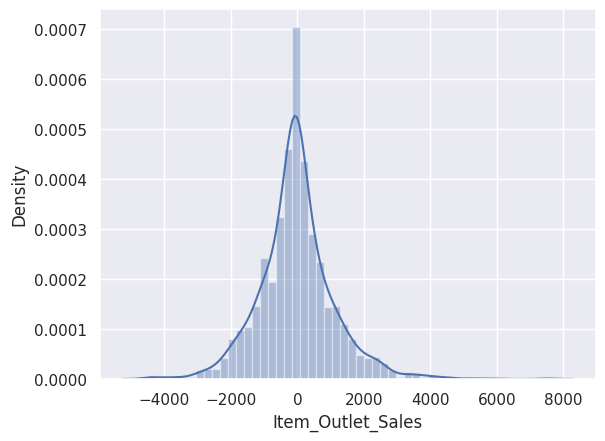

In [ ]:
# RandomForestRegression

regression = predict(RandomForestRegressor())
regression

In [1]:
# Save the Model

# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

NameError: name 'pickle' is not defined